In [59]:
import numpy
import pandas as pd

columns=['dataset', 'skew_type', 'skew', 'nr_clients', 'lr',  'mom',  'experiment_type']   
plotdf = pd.DataFrame(columns=columns)


In [60]:
#params set
datasets = ["mnist","cifar10","svhn_cropped", "emnist"]
skewtypes =['qty_skew','label_skew','feature_skew']
clientNum=[10,20]
for dataset in datasets:
    for skewtype in skewtypes:
        for clients in clientNum:
            if skewtype=='qty_skew':
                skewParams=[0.1,0.4,1.0,2.0]
            if skewtype=='label_skew':
                skewParams=[0.1,1.0,5.0]
            if skewtype=='feature_skew':
                skewParams=[0.1,0.02]
            for skewParam in skewParams:
                print(skewParam)
                fileToRead = 'clustering/experiments/extended_data/'+dataset+'_'+skewtype+'_'+str(skewParam)+'_'+str(clients)+'clients'+'.csv'
                print(fileToRead)

                df = pd.read_csv(fileToRead)
    #           first get the ground truth
                plotdf.loc[len(plotdf)] = [dataset, skewtype, skewParam, clients, df.loc[0,"server_lr"],  df.loc[0,"server_mom"], 'Ground Truth']  
                df = df.sort_values(by=['accuracy'])

                #eliminate fed grid one
                allClients = df.loc[(df['clientID'] >= 0)]
                allClients
                lr = allClients.loc[:,"client_lr"]
                momentum = allClients.loc[:,"client_mom"]
                accuracy = allClients.loc[:,"accuracy"]
                #median,mean, trimmed mean with all client HP results

                meanLR = numpy.mean(lr)
                medianLR = numpy.median(lr)

                meanMom = numpy.mean(momentum)
                medianMom = numpy.median(momentum)

                #trimmed mean
                trimBeta = 0.1

                #trim by value
                lr=numpy.sort(lr)
                mom=numpy.sort(momentum)
                size = len(lr)
                trim = size*trimBeta
                trim

                lrTrimmed = lr[int(trim):int(size)-int(trim)]
                momTrimmed = mom[int(trim):int(size)-int(trim)]

                meanLRTrim = numpy.mean(lrTrimmed)
                meanMomTrim = numpy.mean(momTrimmed)

                print("mean lr=", meanLR)
                print("median lr=", medianLR)
                print("trimmed mean with beta=0.1 lr=", meanLRTrim)

                print("mean momentum=", meanMom)
                print("median momentum=", medianMom)
                print("trimmed mean with beta=0.1 momentum=", meanMomTrim)
                plotdf.loc[len(plotdf)] = [dataset, skewtype, skewParam, clients, meanLR,  meanMom, 'mean']  
                plotdf.loc[len(plotdf)] = [dataset, skewtype, skewParam, clients, meanLRTrim,  meanMomTrim, 'trimmed mean']
                plotdf.loc[len(plotdf)] = [dataset, skewtype, skewParam, clients, medianLR,  medianMom, 'median']
                #mean, median, average with best client HP results wrt accuracy
                lrFinal = []
                momFinal = list()
                fraction = 0.05 #top 5 percent records per client
                for i in range(1,clients+1):
                    clientNow=allClients.loc[allClients['clientID'] == i]
                    sortedClient = clientNow.sort_values(by=['accuracy'])
                    size = len(sortedClient)
                    top = int(size*fraction)
                    lr = sortedClient.loc[:,"client_lr"]
                    mom = sortedClient.loc[:,"client_mom"]
                    lrTrimmed = (lr[int(size)-int(top):int(size)]).values.tolist()
                    momTrimmed = (mom[int(size)-int(top):int(size)]).values.tolist()
                    lrFinal = lrFinal+lrTrimmed
                    momFinal = momFinal+momTrimmed

                meanLR = numpy.mean(lrFinal)
                medianLR = numpy.median(lrFinal)

                meanMom = numpy.mean(momFinal)
                medianMom = numpy.median(momFinal)   
                print("mean lr with top 5 percent per client=", meanLR)
                print("median lr with top 5 percent per client=", medianLR)

                print("mean momentum with top 5 percent per client=", meanMom)
                print("median momentum with top 5 percent per client=", medianMom)

                plotdf.loc[len(plotdf)] = [dataset, skewtype, skewParam, clients, meanLR,  meanMom, 'mean of the top 5%']  
                plotdf.loc[len(plotdf)] = [dataset, skewtype, skewParam, clients, medianLR,  medianMom, 'median of the top 5%']

0.1
clustering/experiments/extended_data/mnist_qty_skew_0.1_10clients.csv
mean lr= 0.15142857142857144
median lr= 0.07
trimmed mean with beta=0.1 lr= 0.12553571428571428
mean momentum= 0.55
median momentum= 0.6
trimmed mean with beta=0.1 momentum= 0.56875
mean lr with top 5 percent per client= 0.32799999999999996
median lr with top 5 percent per client= 0.3
mean momentum with top 5 percent per client= 0.813
median momentum with top 5 percent per client= 0.9
0.4
clustering/experiments/extended_data/mnist_qty_skew_0.4_10clients.csv
mean lr= 0.15142857142857144
median lr= 0.07
trimmed mean with beta=0.1 lr= 0.12553571428571425
mean momentum= 0.55
median momentum= 0.6
trimmed mean with beta=0.1 momentum= 0.5687499999999999
mean lr with top 5 percent per client= 0.3585
median lr with top 5 percent per client= 0.4
mean momentum with top 5 percent per client= 0.8925000000000001
median momentum with top 5 percent per client= 0.95
1.0
clustering/experiments/extended_data/mnist_qty_skew_1.0_10cl

mean lr= 0.14375
median lr= 0.08
trimmed mean with beta=0.1 lr= 0.1159375
mean momentum= 0.55
median momentum= 0.6
trimmed mean with beta=0.1 momentum= 0.56875
mean lr with top 5 percent per client= 0.26412500000000005
median lr with top 5 percent per client= 0.3
mean momentum with top 5 percent per client= 0.7625
median momentum with top 5 percent per client= 0.9
0.1
clustering/experiments/extended_data/svhn_cropped_qty_skew_0.1_10clients.csv
mean lr= 0.15142857142857144
median lr= 0.07
trimmed mean with beta=0.1 lr= 0.12553571428571428
mean momentum= 0.55
median momentum= 0.6
trimmed mean with beta=0.1 momentum= 0.56875
mean lr with top 5 percent per client= 0.24340000000000003
median lr with top 5 percent per client= 0.3
mean momentum with top 5 percent per client= 0.612
median momentum with top 5 percent per client= 0.6
0.4
clustering/experiments/extended_data/svhn_cropped_qty_skew_0.4_10clients.csv
mean lr= 0.15142857142857144
median lr= 0.07
trimmed mean with beta=0.1 lr= 0.12553

In [61]:

#  READ ALL DBSCAN RESULTS
fileToRead = 'data'+'.csv'
df = pd.read_csv(fileToRead)
allDBSCAN = df.loc[(df['experiment_type'] == 'DBSCAN HPO')]
allDBSCAN = allDBSCAN.reset_index()
for index, row in allDBSCAN.iterrows():
    if row['skew_type']=='feature':
        plotdf.loc[len(plotdf)] = [row['dataset'], 'feature_skew', row['skew'], int(row['nr_clients']), float(row['lr']), float(row['mom']), 'DBSCAN']
    if row['skew_type']=='label':
        plotdf.loc[len(plotdf)] = [row['dataset'], 'label_skew', row['skew'], int(row['nr_clients']), float(row['lr']), float(row['mom']), 'DBSCAN']
    if row['skew_type']=='qty':
        plotdf.loc[len(plotdf)] = [row['dataset'], 'qty_skew', row['skew'], int(row['nr_clients']), float(row['lr']), float(row['mom']), 'DBSCAN']
        
        
        

In [62]:
import sys
sys.path.append('../../')

import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Set the font size for x tick labels
plt.rc('xtick', labelsize=30)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=30)
from matplotlib.lines import Line2D

columns=['dataset', 'skew_type', 'skew', 'nr_clients', 'lr',  'mom', 'bs', 'experiment_type']   

def plot_barplot1(df, hue=[], title='', saveTitle='', saveFig=False, savePath='measurement_results/',param='', param_ann='',skew_type='',skew=''):
    sns.set_theme()
    plt.figure(figsize=(23, 8))

    ax = sns.barplot(y=param_ann, x="dataset", hue="experiment_type",
                hue_order=hue,
                data=df)
    
    sns.set(font_scale=0.8)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points', fontsize='28')
    
    plt.legend(loc='lower left')
    plt.setp(ax.get_legend().get_texts(), fontsize='28')
    ax.xaxis.label.set_fontsize(34)
    ax.yaxis.label.set_fontsize(34)
#     plt.title(title, fontsize='20')
    plt.ylabel(param)
    plt.xlabel("Dataset")
    ax.tick_params(labelsize=34)
    ax.set_xticklabels(["MNIST","CIFAR10","SVHN", "EMNIST"])
    plt.tight_layout()

    if saveFig:
        print(param+'_'+skew_type+skew+".pdf")
        plt.savefig(param+'_'+skew_type+skew+".pdf")
        
    plt.show()
    plt.close()
    

Learning Rate_label_skew1.0.pdf


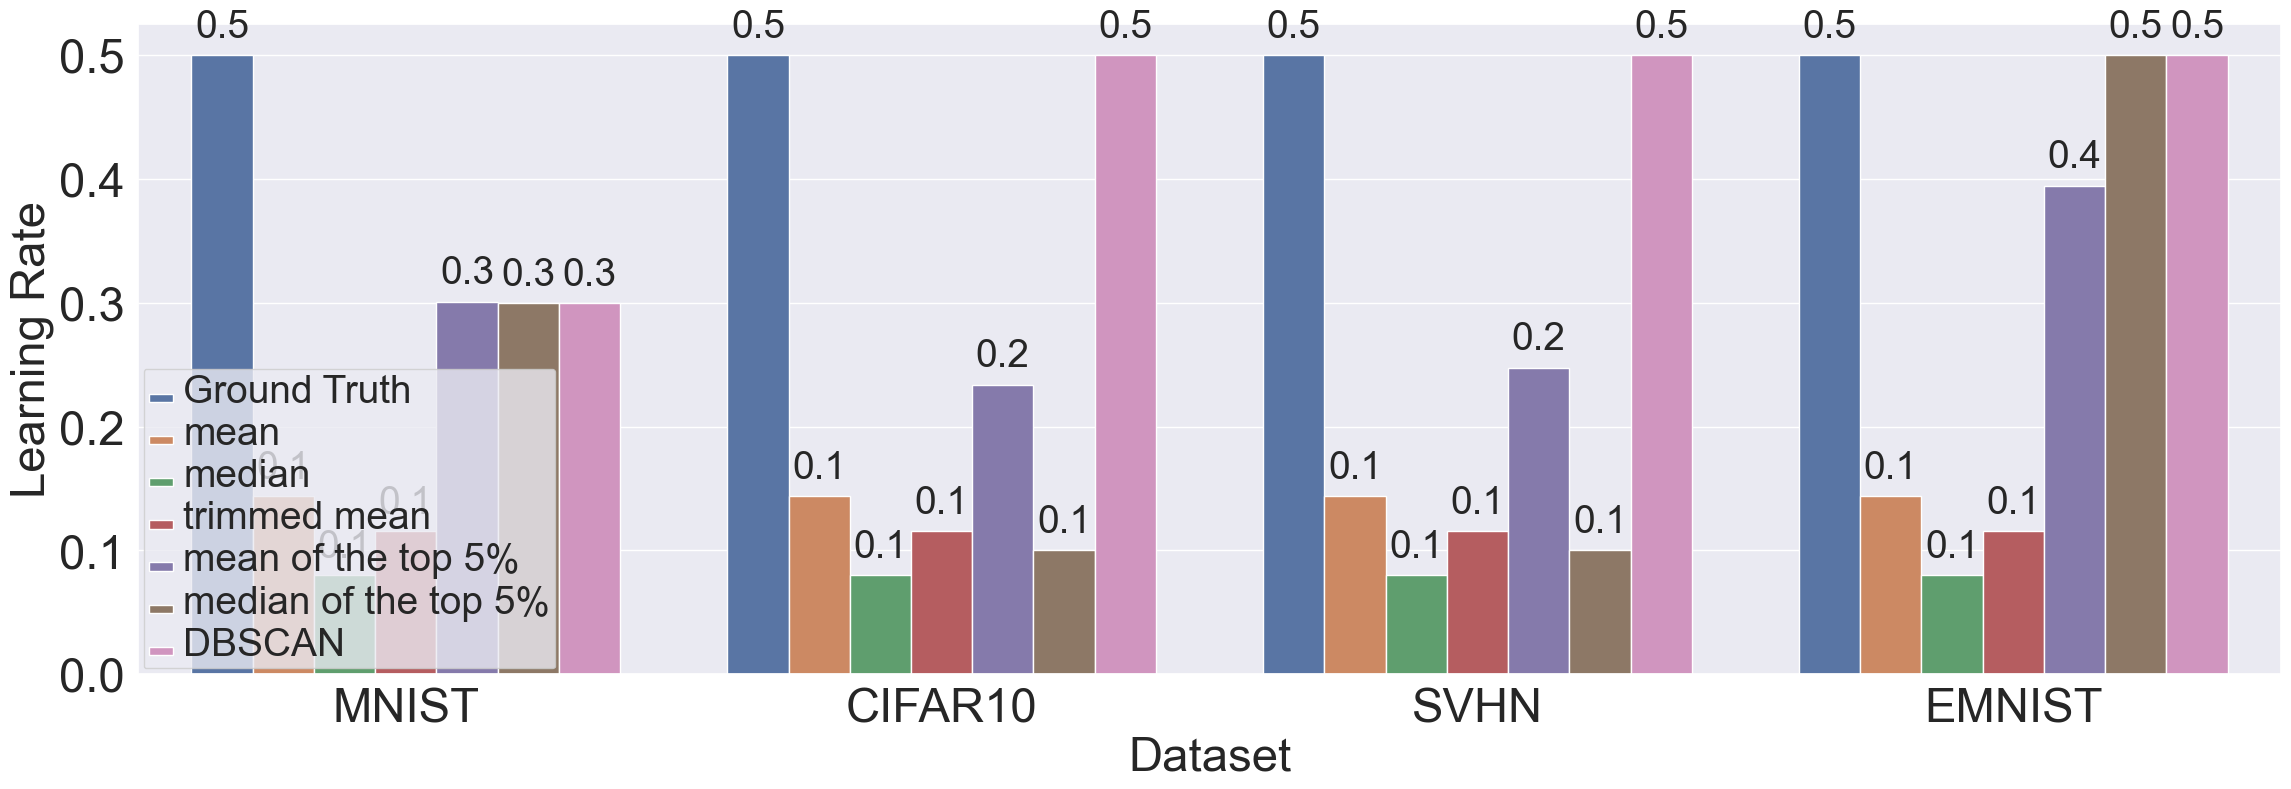

Momentum_label_skew1.0.pdf


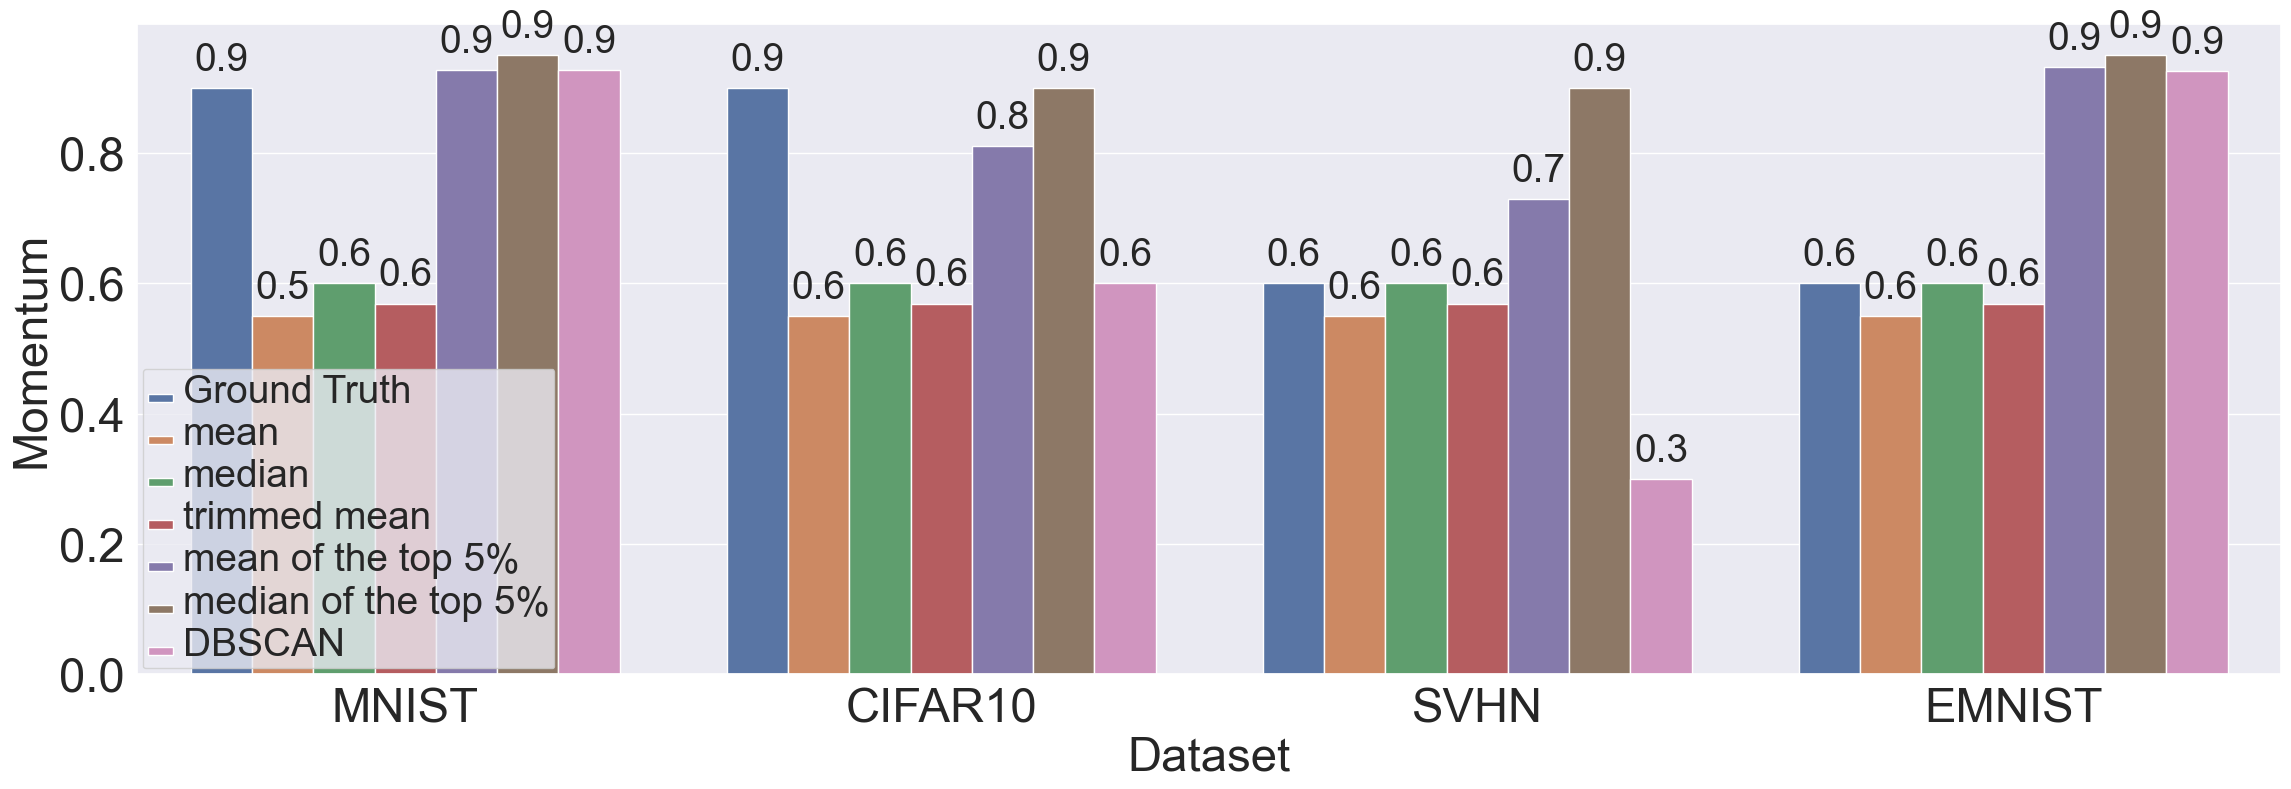

In [63]:
#select some experiments: 
#label skew with 1.0

plotdfL = plotdf.loc[(plotdf['skew_type'] == 'label_skew') & (plotdf['skew'] == 1.0)& (plotdf['nr_clients'] == 10)]

hue = ['Ground Truth', 'mean', 'median', 'trimmed mean', 'mean of the top 5%','median of the top 5%','DBSCAN']
plot_barplot1(plotdfL, title="Measurements", savePath='measurement_results/', saveFig=True, hue=hue,param="Learning Rate",param_ann="lr", skew_type='label_skew',skew='1.0')


hue = ['Ground Truth', 'mean', 'median', 'trimmed mean', 'mean of the top 5%','median of the top 5%','DBSCAN']
plot_barplot1(plotdfL, title="Measurements", savePath='measurement_results/', saveFig=True, hue=hue,param="Momentum",param_ann="mom", skew_type='label_skew',skew='1.0')


Learning Rate_feature_skew0.02.pdf


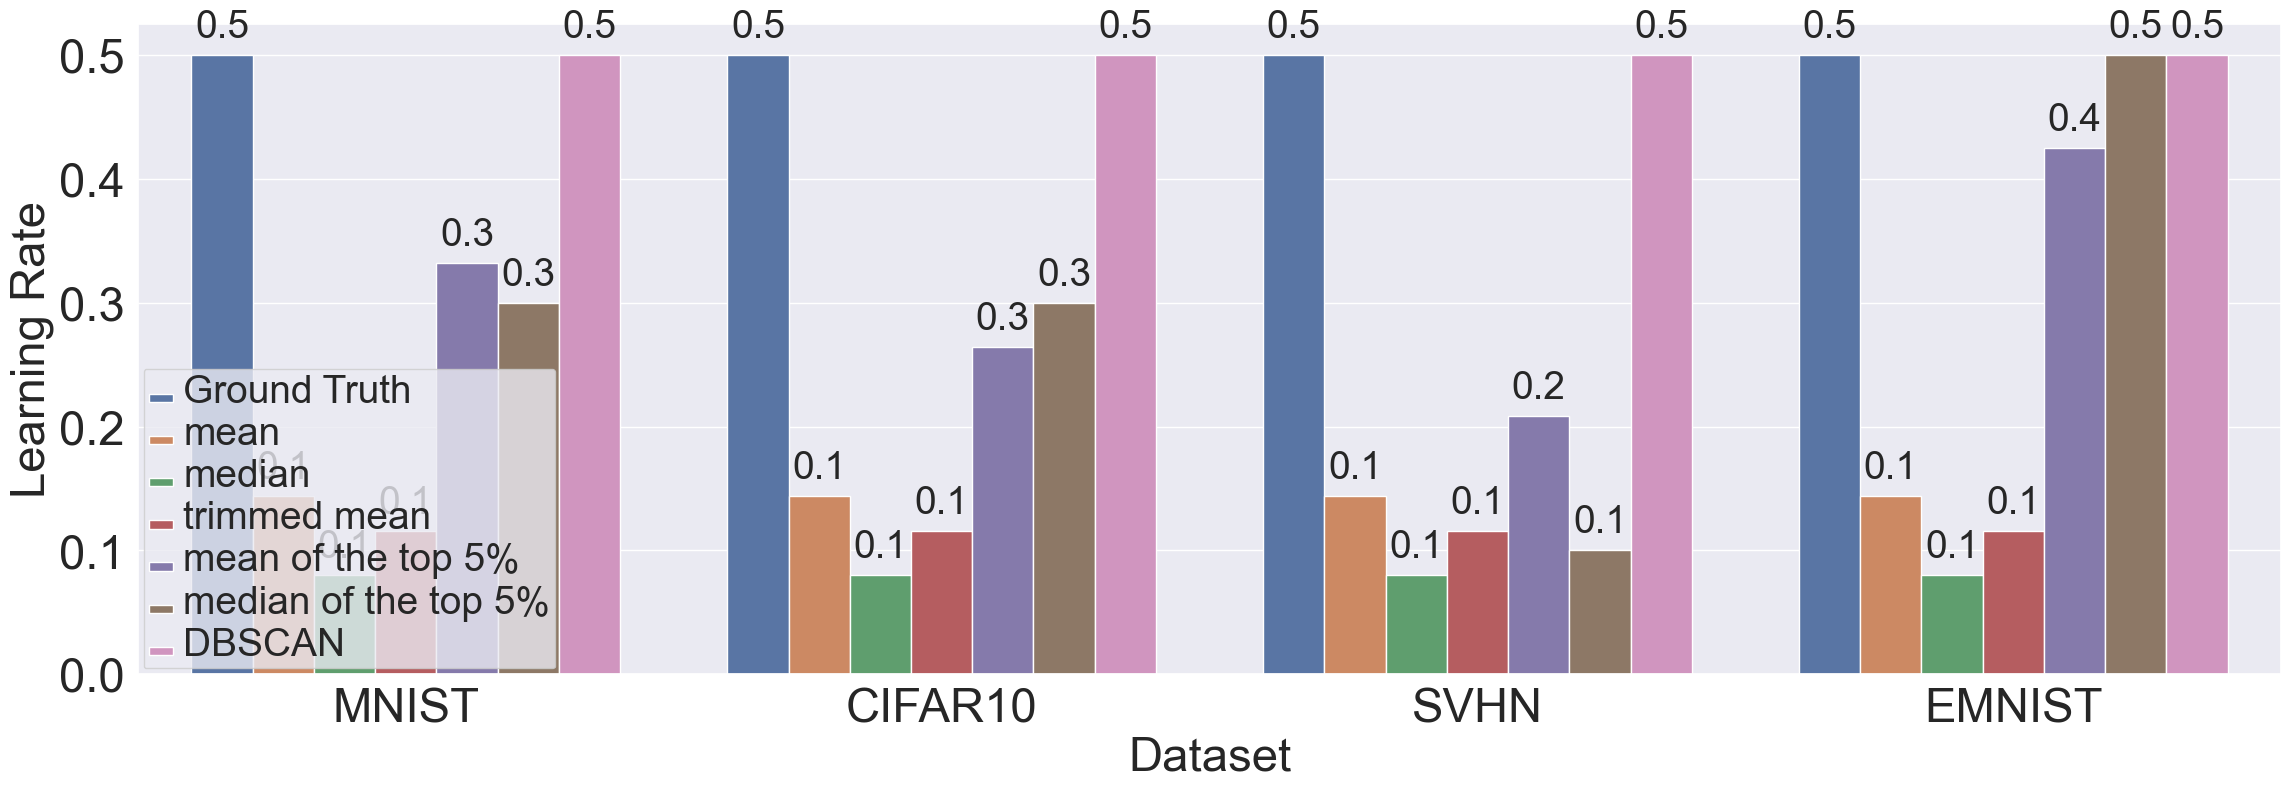

Momentum_feature_skew0.02.pdf


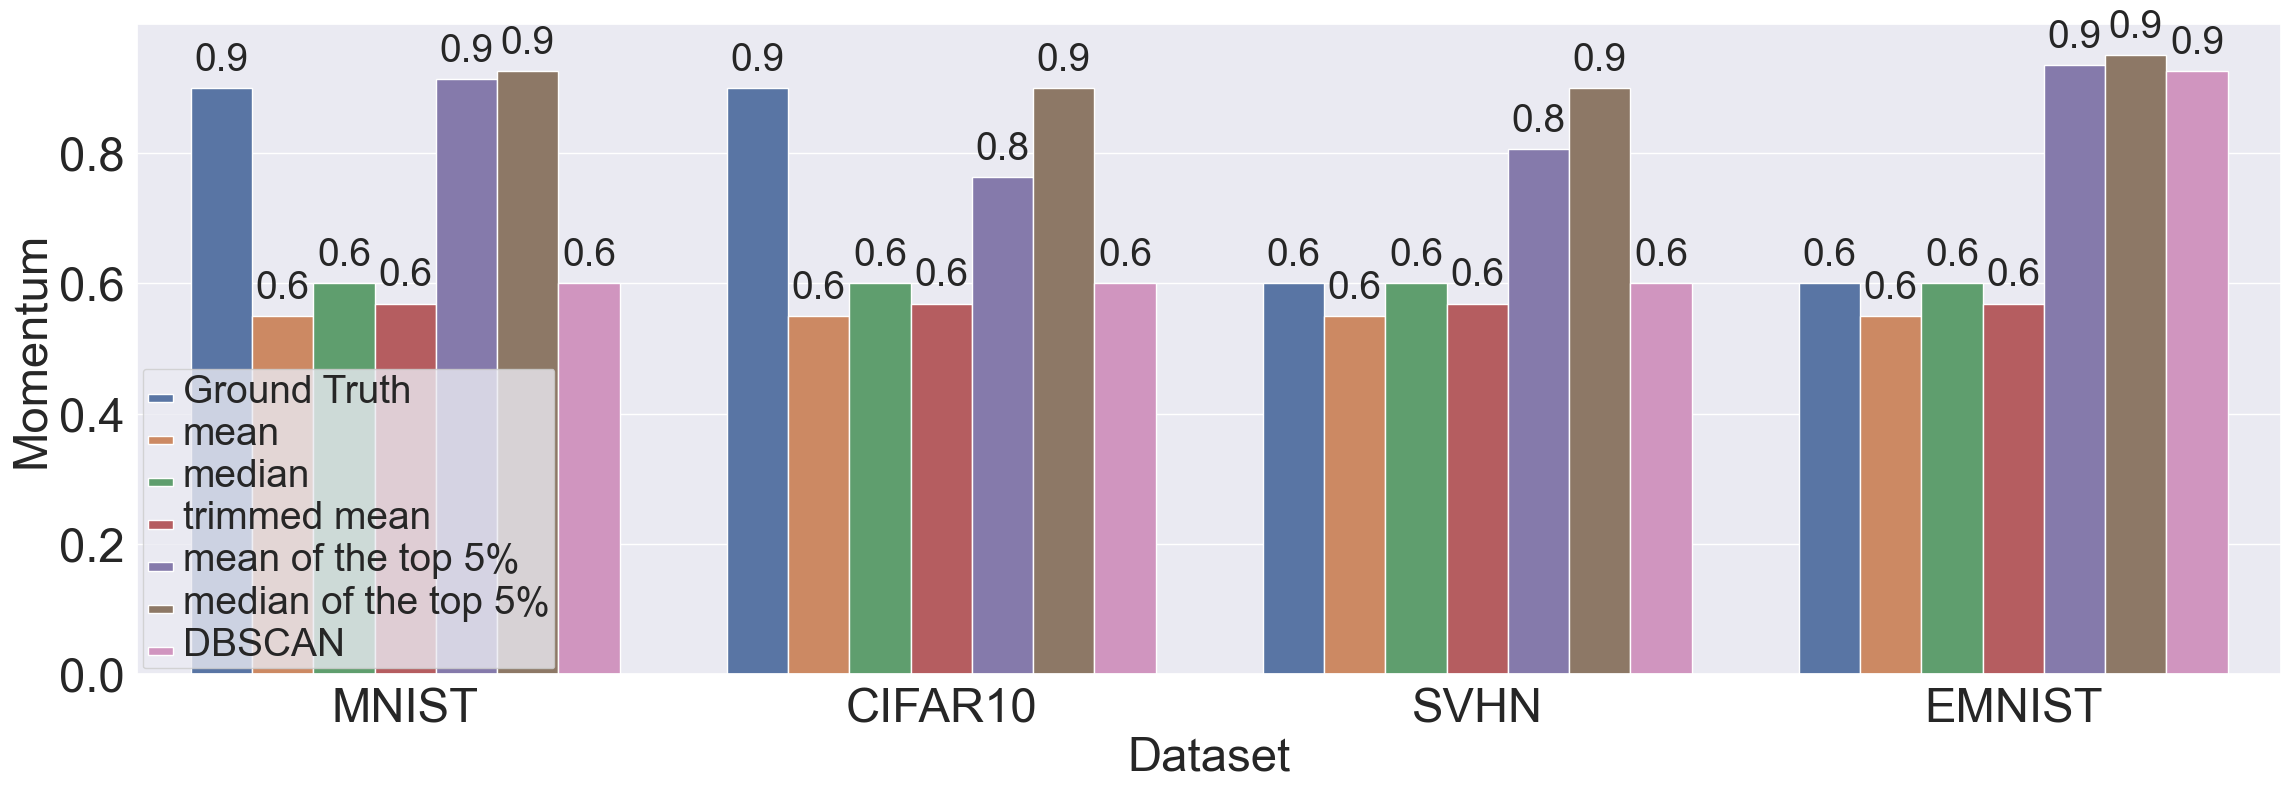

In [64]:
#select some experiments: 
#feature skew with 0.02

plotdfL = plotdf.loc[(plotdf['skew_type'] == 'feature_skew') & (plotdf['skew'] == 0.02)& (plotdf['nr_clients'] == 20)]

hue = ['Ground Truth', 'mean', 'median', 'trimmed mean', 'mean of the top 5%','median of the top 5%','DBSCAN']
plot_barplot1(plotdfL, title="Measurements", savePath='', saveFig=True, hue=hue,param="Learning Rate",param_ann="lr", skew_type='feature_skew',skew='0.02')

hue = ['Ground Truth', 'mean', 'median', 'trimmed mean', 'mean of the top 5%','median of the top 5%','DBSCAN']
plot_barplot1(plotdfL, title="Measurements", savePath='', saveFig=True, hue=hue,param="Momentum",param_ann="mom", skew_type='feature_skew',skew='0.02')


Learning Rate_feature_skew0.02.pdf


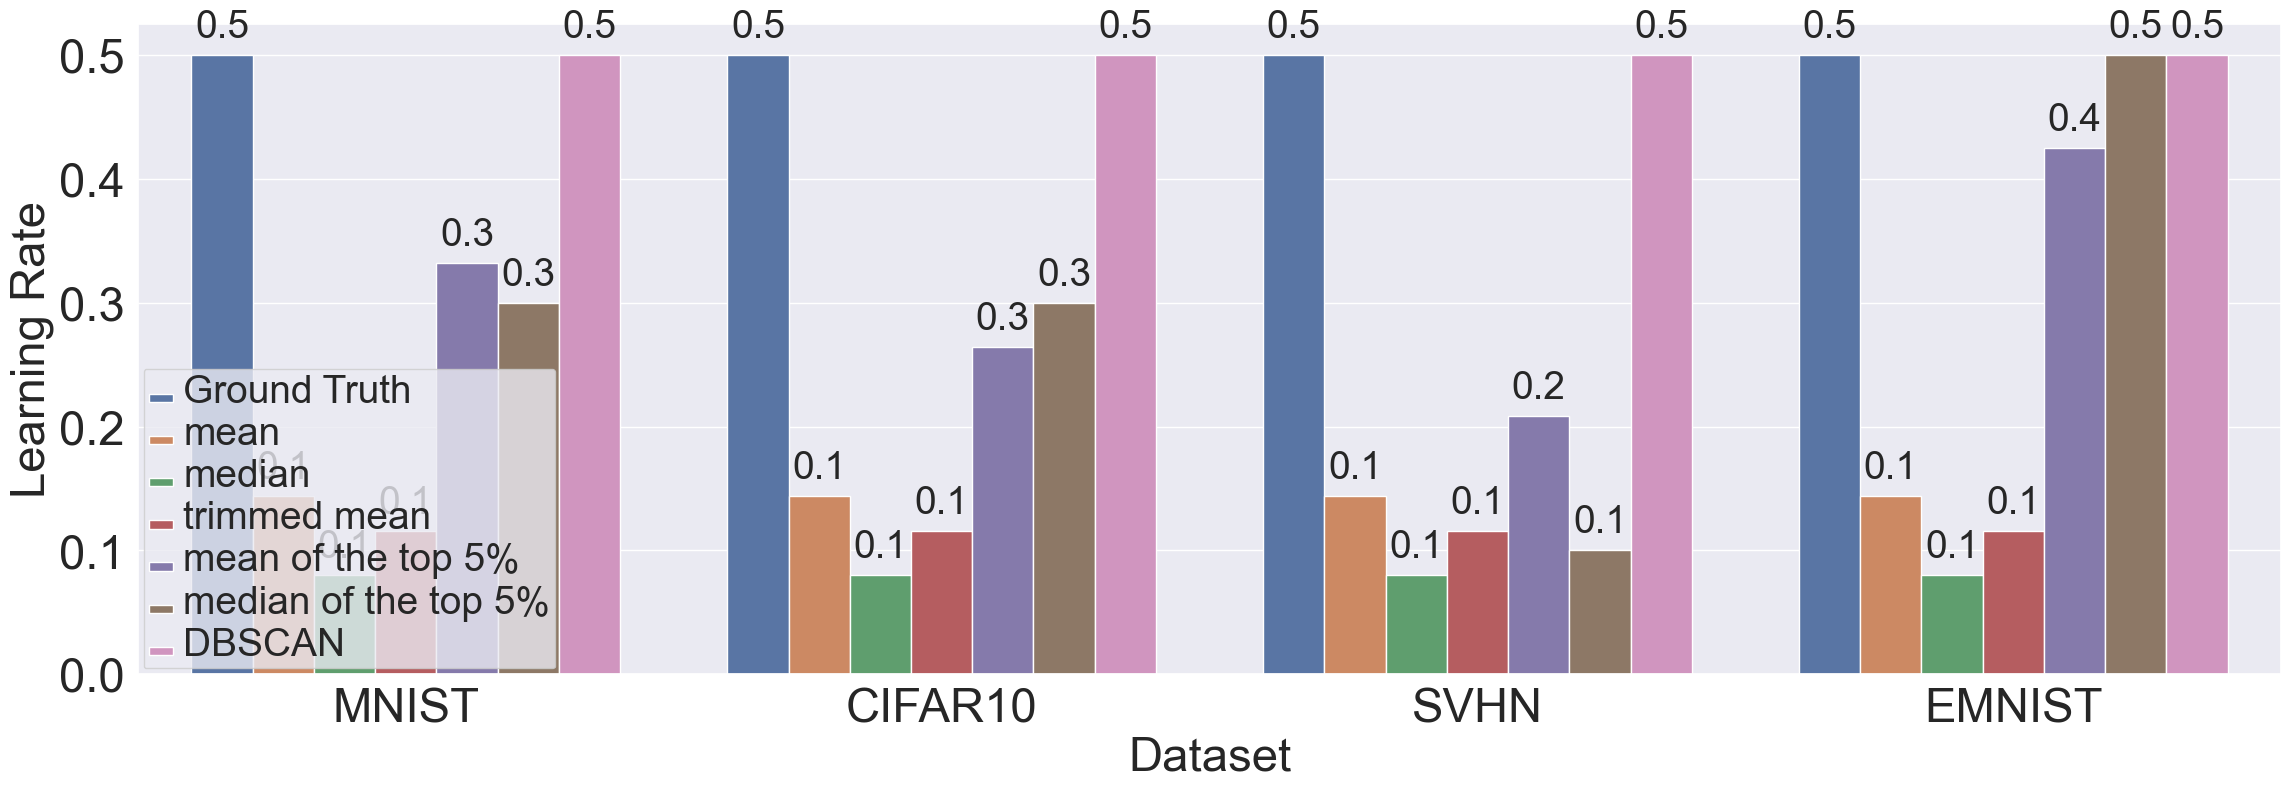

Momentum_feature_skew0.02.pdf


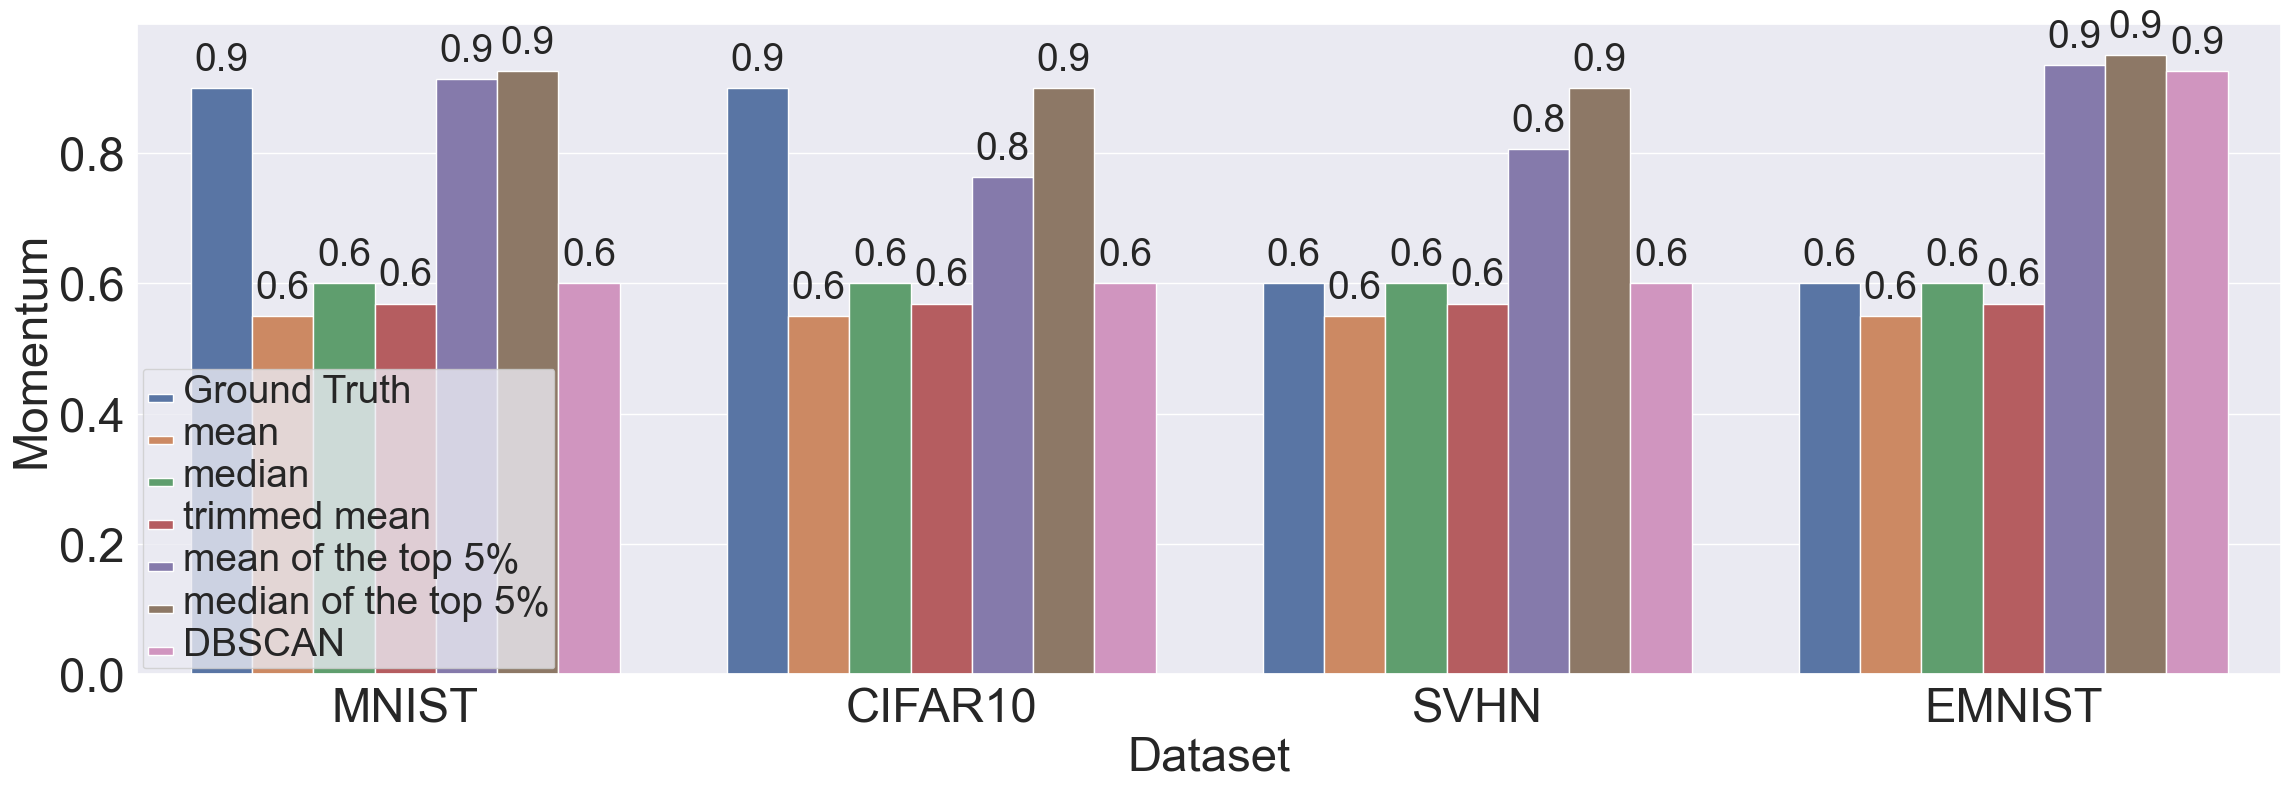

In [65]:
#select some experiments: 
#feature skew with 0.02

plotdfL = plotdf.loc[(plotdf['skew_type'] == 'feature_skew') & (plotdf['skew'] == 0.02)& (plotdf['nr_clients'] == 20)]

hue = ['Ground Truth', 'mean', 'median', 'trimmed mean', 'mean of the top 5%','median of the top 5%','DBSCAN']
plot_barplot1(plotdfL, title="Measurements", savePath='', saveFig=True, hue=hue,param="Learning Rate",param_ann="lr", skew_type='feature_skew',skew='0.02')

hue = ['Ground Truth', 'mean', 'median', 'trimmed mean', 'mean of the top 5%','median of the top 5%','DBSCAN']
plot_barplot1(plotdfL, title="Measurements", savePath='', saveFig=True, hue=hue,param="Momentum",param_ann="mom", skew_type='feature_skew',skew='0.02')


Learning Rate_qty_skew2.0.pdf


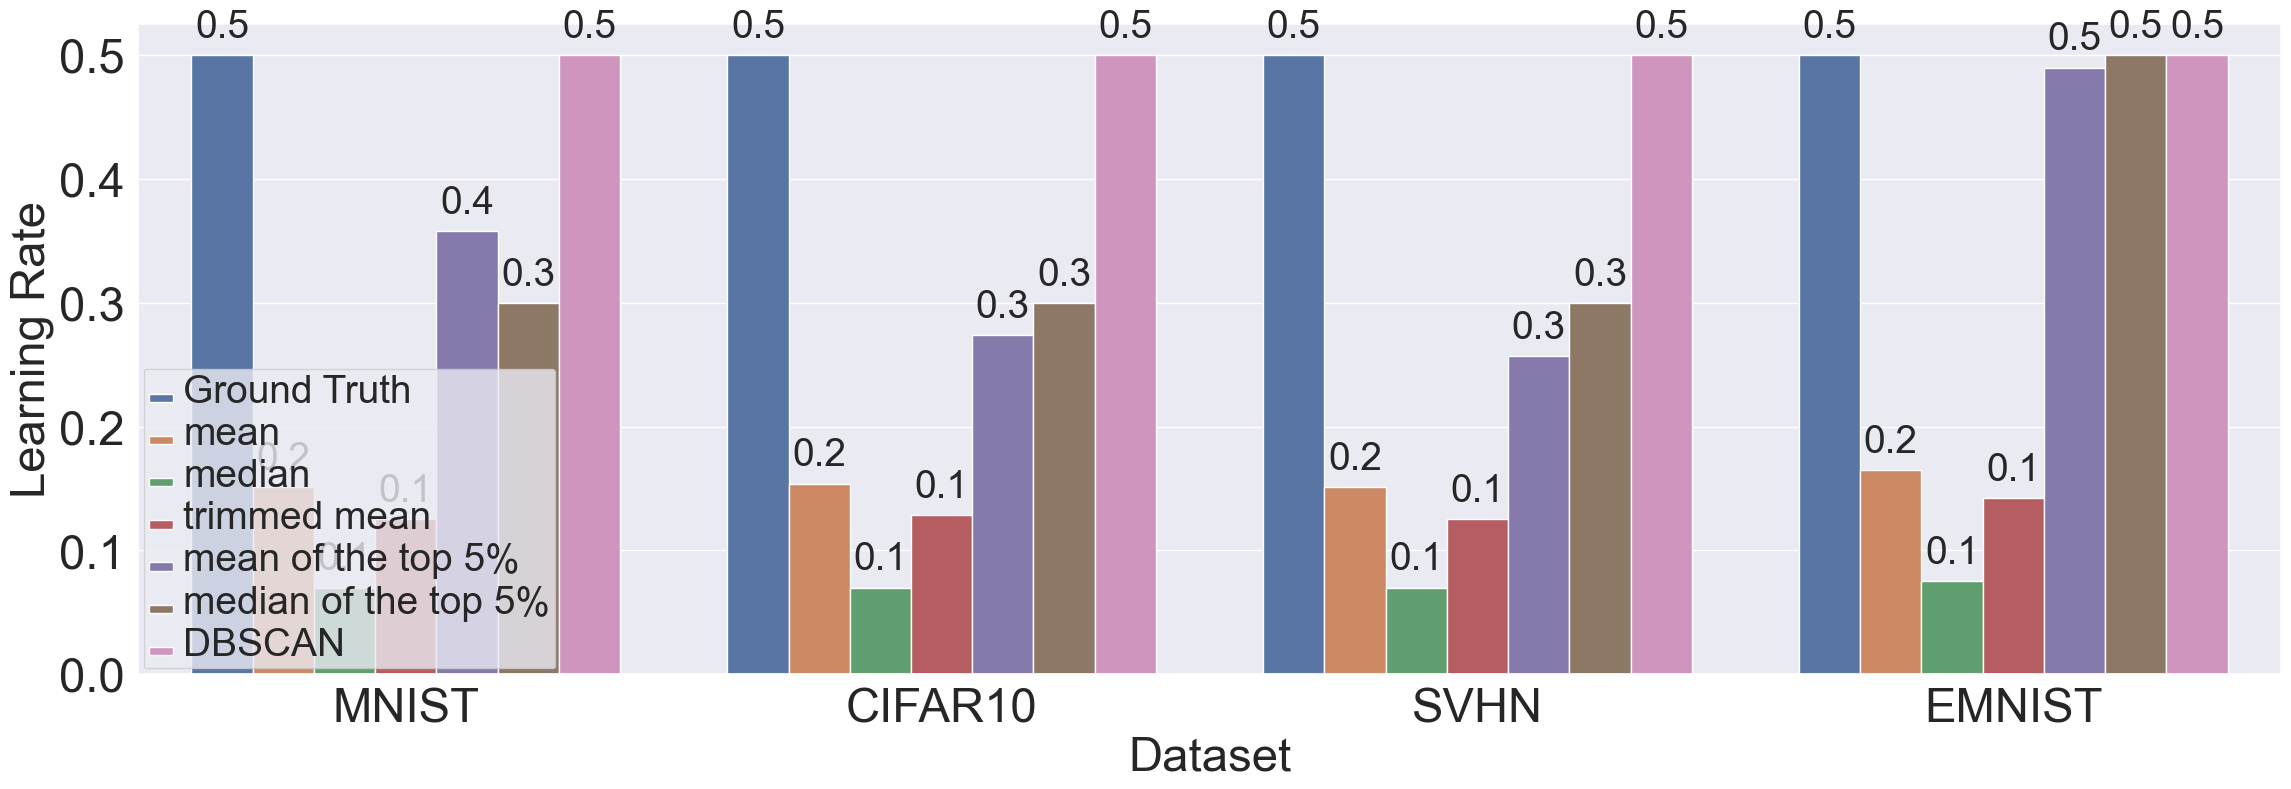

Momentum_qty_skew2.0.pdf


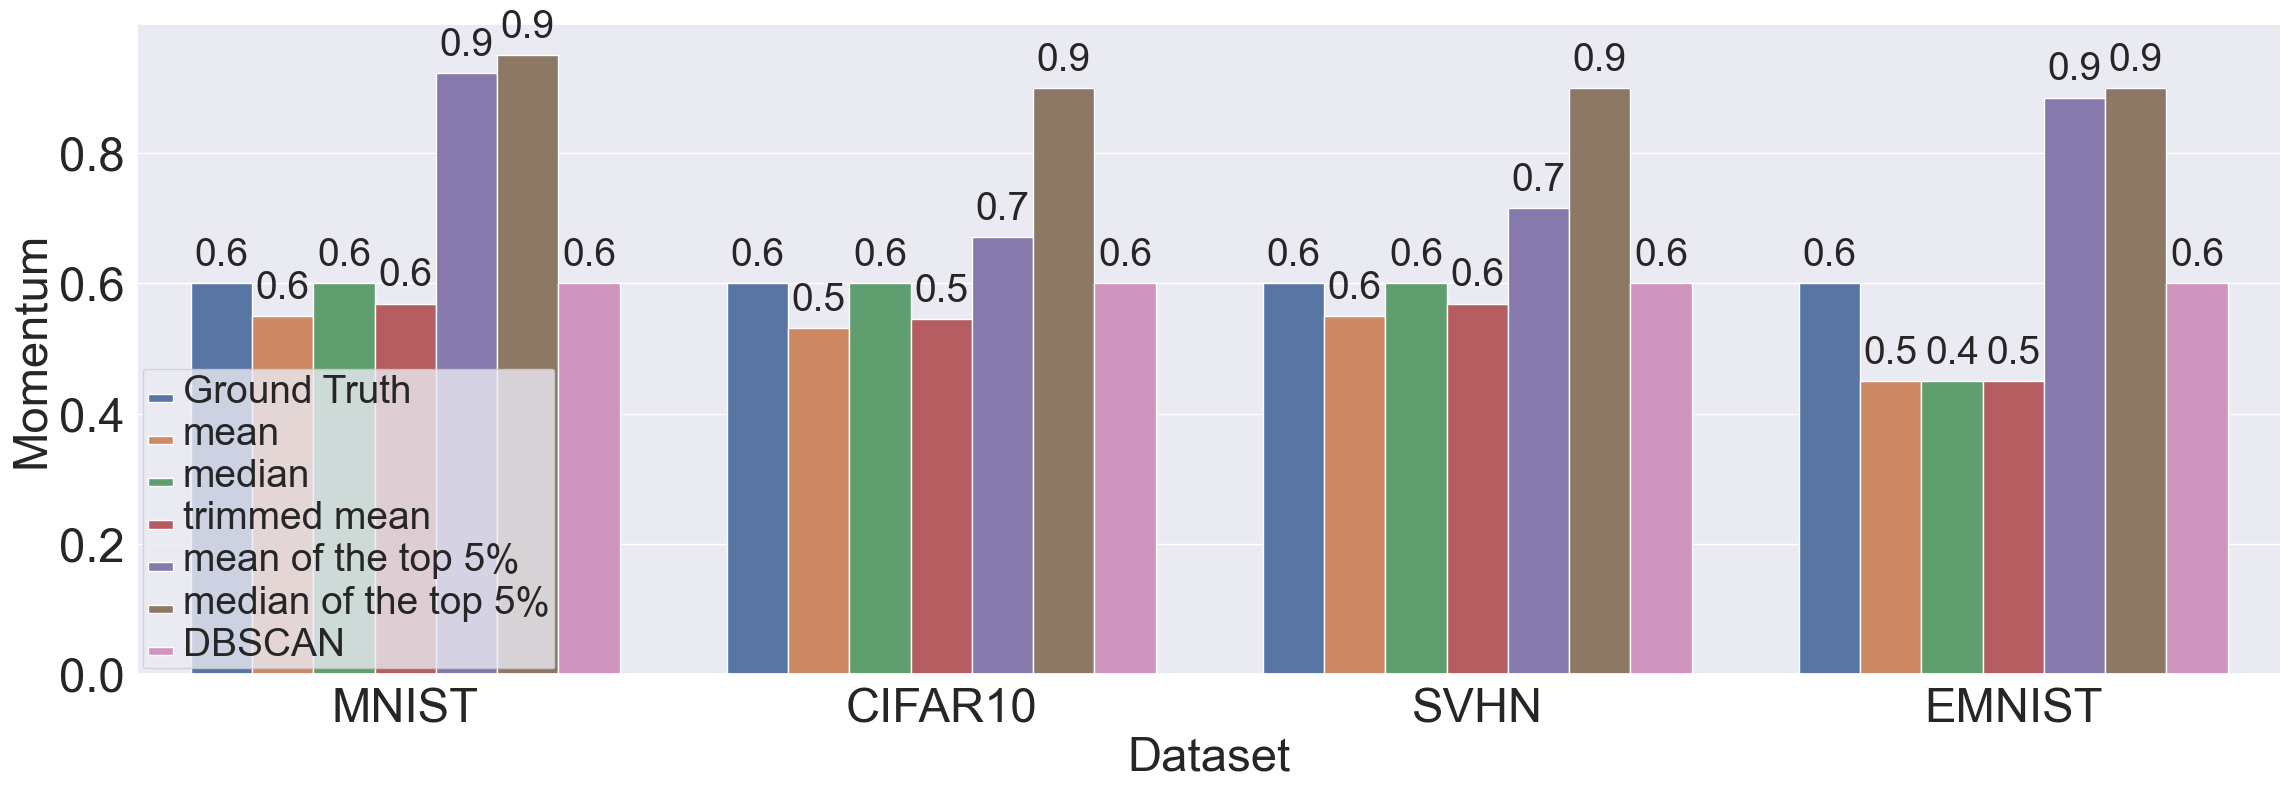

In [66]:
#select some experiments: 
#qty skew with 2.0

plotdfL = plotdf.loc[(plotdf['skew_type'] == 'qty_skew') & (plotdf['skew'] == 2.0)& (plotdf['nr_clients'] == 20)]

hue = ['Ground Truth', 'mean', 'median', 'trimmed mean', 'mean of the top 5%','median of the top 5%','DBSCAN']
plot_barplot1(plotdfL, title="Measurements", savePath='', saveFig=True, hue=hue,param="Learning Rate",param_ann="lr", skew_type='qty_skew',skew='2.0')
plot_barplot1(plotdfL, title="Measurements", savePath='', saveFig=True, hue=hue,param="Momentum",param_ann="mom", skew_type='qty_skew',skew='2.0')


Learning Rate_label_skew1.0.pdf


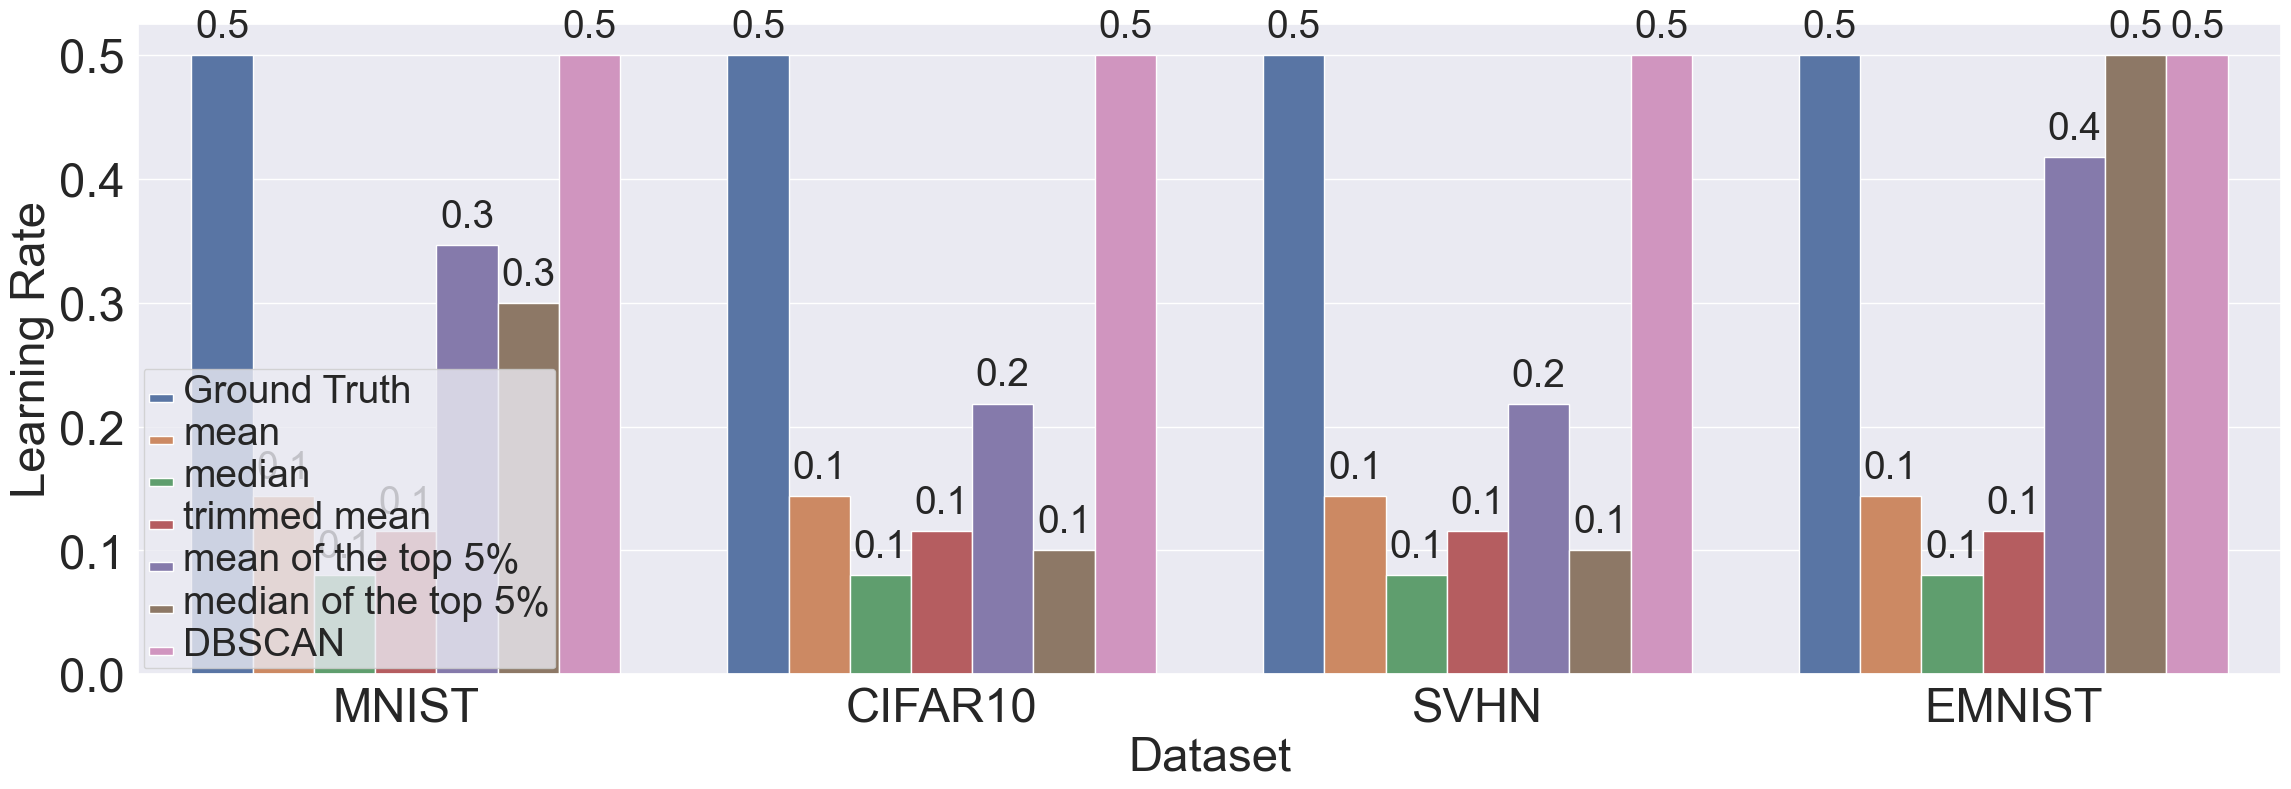

Momentum_label_skew1.0.pdf


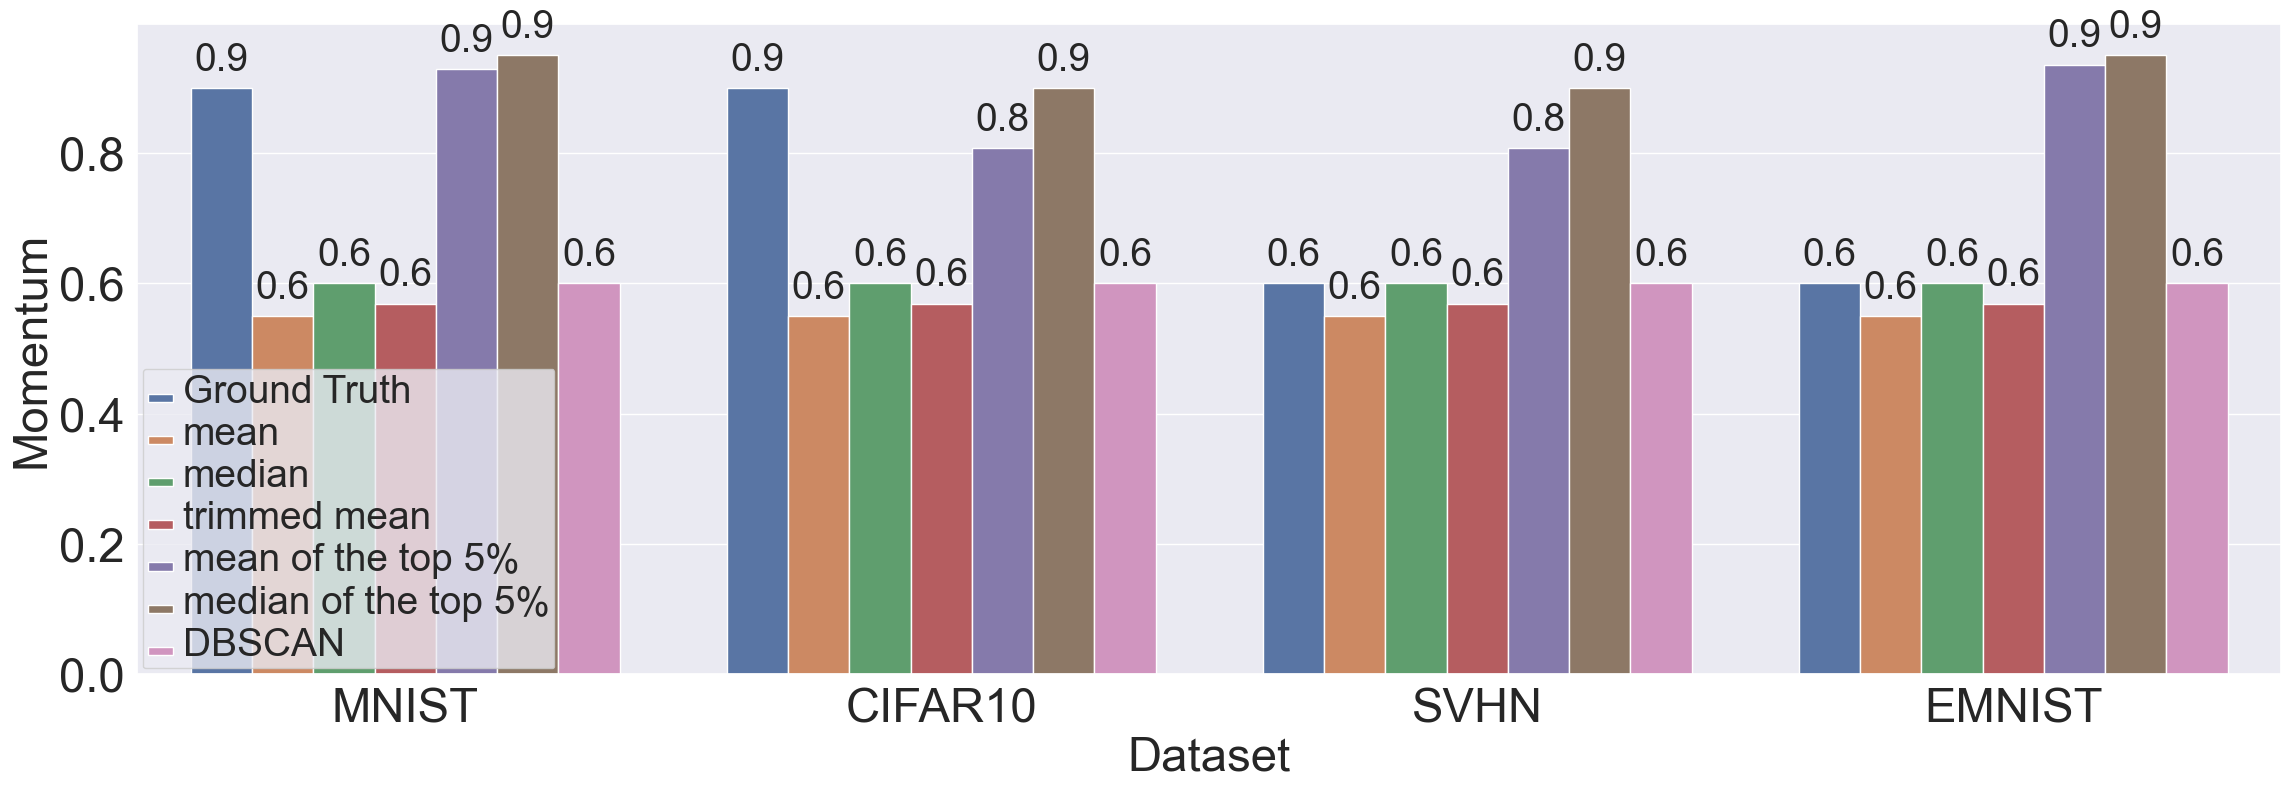

In [67]:
#select some experiments: 
#feature skew with 0.02

plotdfL = plotdf.loc[(plotdf['skew_type'] == 'label_skew') & (plotdf['skew'] == 1.0)& (plotdf['nr_clients'] == 20)]

hue = ['Ground Truth', 'mean', 'median', 'trimmed mean', 'mean of the top 5%','median of the top 5%','DBSCAN']
plot_barplot1(plotdfL, title="Measurements", savePath='', saveFig=True, hue=hue,param="Learning Rate",param_ann="lr", skew_type='label_skew',skew='1.0')

hue = ['Ground Truth', 'mean', 'median', 'trimmed mean', 'mean of the top 5%','median of the top 5%','DBSCAN']
plot_barplot1(plotdfL, title="Measurements", savePath='', saveFig=True, hue=hue,param="Momentum",param_ann="mom", skew_type='label_skew',skew='1.0')


In [68]:
plotdf
plotdf = plotdf.round(2)
equals=0
countExper=0
#find the count of the closest values: 
datasets = ["mnist","cifar10","svhn_cropped", "emnist"]
skewtypes =['qty_skew','label_skew','feature_skew']
clientNum=[10,20]
listBest=[]
for dataset in datasets:
    for skewtype in skewtypes:
        for clients in clientNum:
            if skewtype=='qty_skew':
                skewParams=[0.1,0.4,1.0,2.0]
            if skewtype=='label_skew':
                skewParams=[0.1,1.0,5.0]
            if skewtype=='feature_skew':
                skewParams=[0.1,0.02]
            for skewParam in skewParams:
                countExper=countExper+2 #|(counting both lr and momentum at the same time)
                new=plotdf.loc[(plotdf["dataset"] == dataset) & (plotdf["skew_type"] == skewtype)& (plotdf["skew"] == skewParam)&
                                        (plotdf["nr_clients"] == clients)]
#                 print(new)
                gt= new.loc[(new['experiment_type'] == "Ground Truth")]
                new = new.drop(labels=gt.index, axis=0)
                #find absolutes
                new['lr'] = abs(new['lr'] - float(gt.lr))
                new['mom'] = abs(new['mom'] - float(gt.mom))
                bestLR= new.nsmallest(n=2, columns="lr") 
                bestMom=new.nsmallest(n=2, columns="mom") 
                if (bestLR.loc[bestLR.index[0]].lr==bestLR.loc[bestLR.index[1]].lr):
                    equals=equals+1
                else: 
                    minLR = min((bestLR.loc[bestLR.index[0]].lr),(bestLR.loc[bestLR.index[1]].lr))
                    minLRExp = bestLR.loc[bestLR.lr==minLR].experiment_type
                    listBest.append(minLRExp.to_string(index = False))
                if (bestMom.loc[bestMom.index[0]].mom==bestMom.loc[bestMom.index[1]].mom):
                    equals=equals+1
                 
                else: 
                    minMom = min((bestMom.loc[bestMom.index[0]].mom),(bestMom.loc[bestMom.index[1]].mom))
                    minMomExp = bestMom.loc[bestMom.mom==minMom].experiment_type

print(listBest)
print(equals)
print(listBest.count('median of the top 5%'))
print(listBest.count('mean of the top 5%'))
print(listBest.count('mean'))
print(listBest.count('median'))
print(listBest.count('trimmed mean'))
print(listBest.count('DBSCAN'))
print(listBest.count('median of the top 5%')+listBest.count('mean of the top 5%')+listBest.count('mean')+listBest.count('median')
     +listBest.count('trimmed mean')+listBest.count('DBSCAN')+equals)

['median of the top 5%', 'median of the top 5%', 'DBSCAN', 'mean of the top 5%', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'mean of the top 5%', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'median of the top 5%', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'DBSCAN', 'mean of the top 5%', 'mean', 'mean of the top 5%', 'DBSCAN', 'DBSCAN']
42
3
4
1
0
0
47
97


/var/folders/xq/gd4dhb4s1qn_fccw3y9kgfmm0000gn/T/ipykernel_59128/229012732.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  new['lr'] = abs(new['lr'] - float(gt.lr))
/var/folders/xq/gd4dhb4s1qn_fccw3y9kgfmm0000gn/T/ipykernel_59128/229012732.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  new['mom'] = abs(new['mom'] - float(gt.mom))
/var/folders/xq/gd4dhb4s1qn_fccw3y9kgfmm0000gn/T/ipykernel_59128/229012732.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  new['lr'] = abs(new['lr'] - float(gt.lr))
/var/folders/xq/gd4dhb4s1qn_fccw3y9kgfmm0000gn/T/ipykernel_59128/229012732.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the futu

    dataset     skew_type  skew  nr_clients   lr  mom experiment_type
426  emnist  feature_skew  0.02          20  0.5  0.6    Ground Truth
    dataset     skew_type  skew  nr_clients    lr   mom       experiment_type
427  emnist  feature_skew  0.02          20  0.14  0.55                  mean
428  emnist  feature_skew  0.02          20  0.12  0.57          trimmed mean
429  emnist  feature_skew  0.02          20  0.08  0.60                median
430  emnist  feature_skew  0.02          20  0.42  0.93    mean of the top 5%
431  emnist  feature_skew  0.02          20  0.50  0.95  median of the top 5%
446  emnist  feature_skew  0.02          20  0.50  0.92                DBSCAN
    dataset     skew_type  skew  nr_clients    lr   mom       experiment_type
427  emnist  feature_skew  0.02          20  0.36  0.55                  mean
428  emnist  feature_skew  0.02          20  0.38  0.57          trimmed mean
429  emnist  feature_skew  0.02          20  0.42  0.60                median
43

/var/folders/xq/gd4dhb4s1qn_fccw3y9kgfmm0000gn/T/ipykernel_59128/1161440480.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  new['lr'] = abs(new['lr'] - float(a.lr))


7
